# File overview

- Find all the files in the folder
- Select a file and list their content
- Plot a single variable from one file
- Get calibration parameters

Useful link with tutorial:

https://lumicks-pylake.readthedocs.io/en/latest/install.html

## Find all the files in the folder 

In [58]:
"""  in case pylake is not installed """
!pip install lumicks.pylake

'  in case pylake is not installed '

In [1]:
### ----- load libraries so that you can analyze the exported data
import lumicks.pylake as pylake
import numpy as np
import matplotlib.pyplot as plt


found 13 files in folder
20190215-113704 Marker dynamics.h5
20190215-113707 Marker definitely.h5
20190215-113713 Marker increase in force.h5
20190215-113715 Marker maybe motion.h5
20190215-113722 Marker 4.h5
20190215-113727 Marker 3.h5
20190215-115718 Marker try 4.h5
20190215-115722 Marker try 3.h5
20190215-142512 Marker force clamp.h5
20190215-170635 Marker single stepping 1.h5
20190215-170637 Marker single steppin 2.h5
20190215-170639 Marker single steppin 3.h5
20190215-180718 Marker single steppin 4.h5


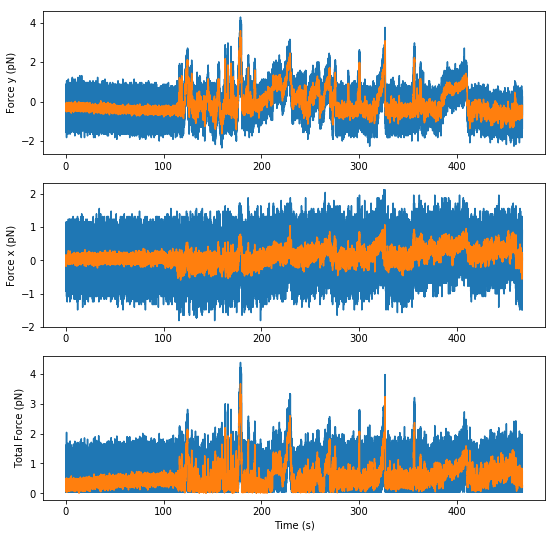

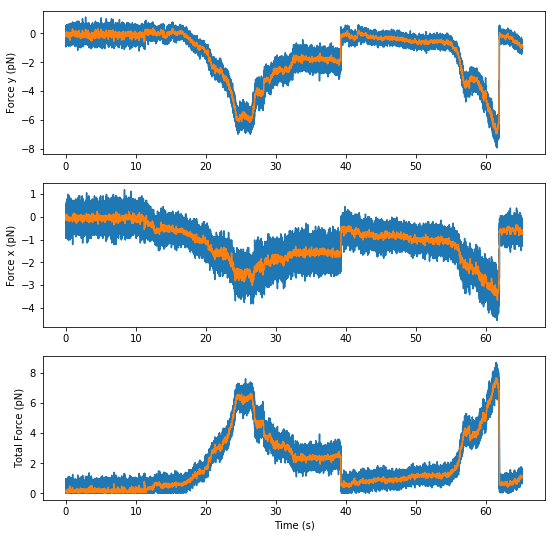

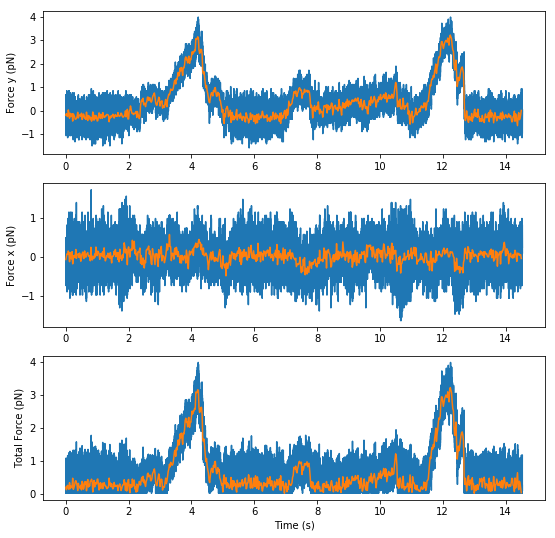

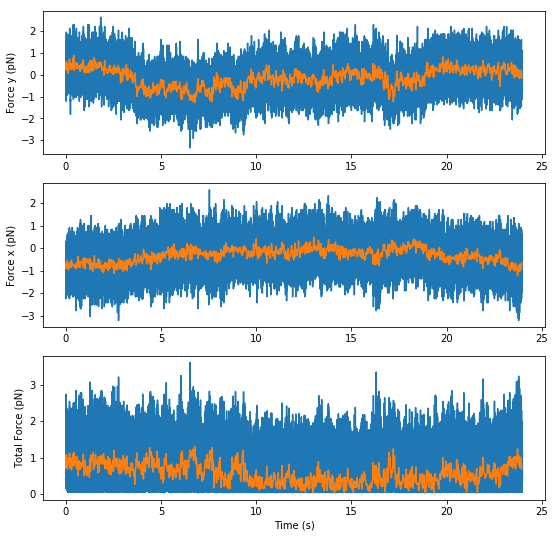

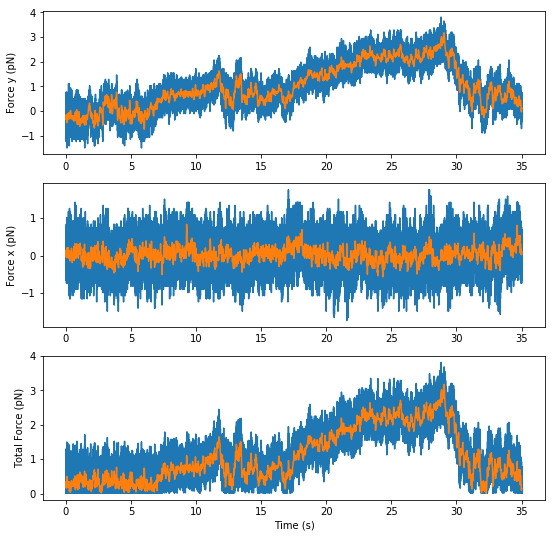

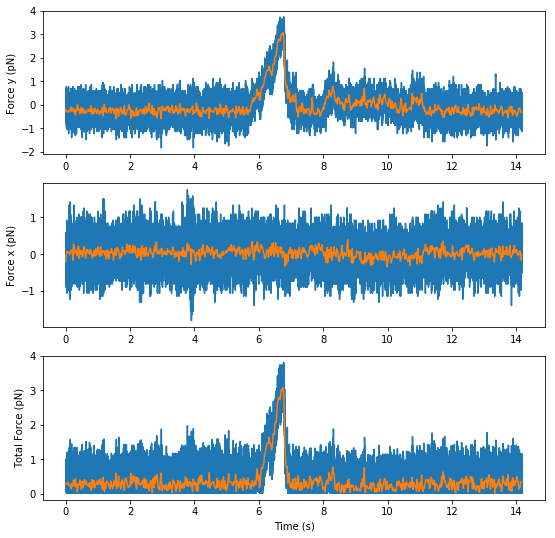

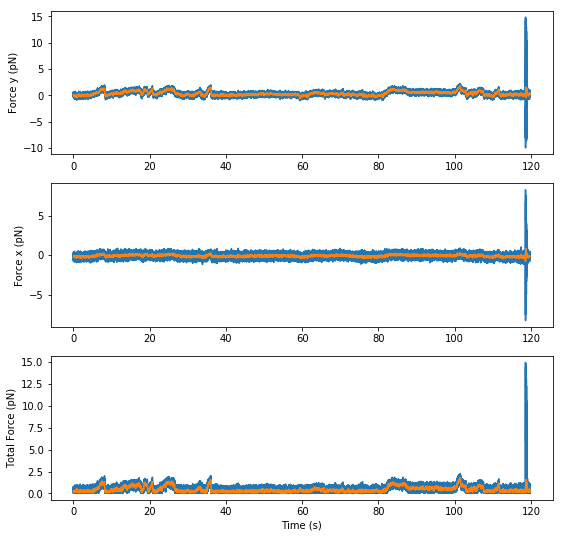

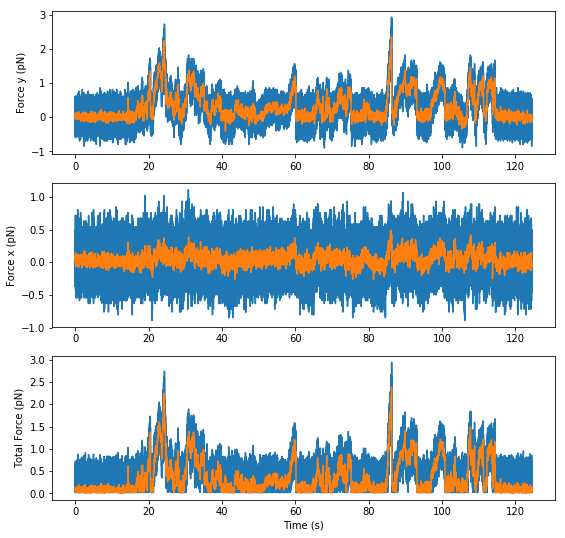

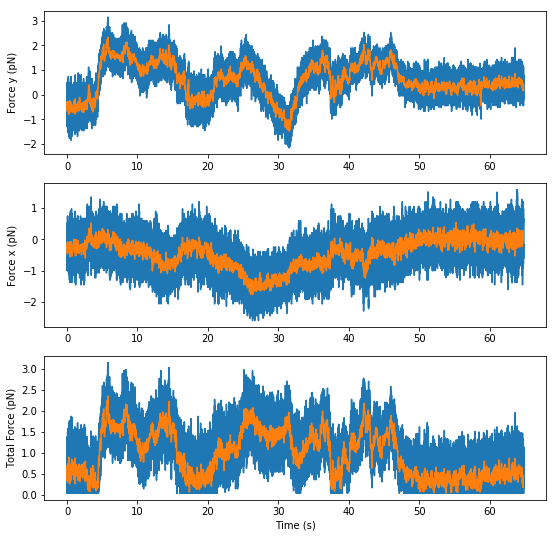

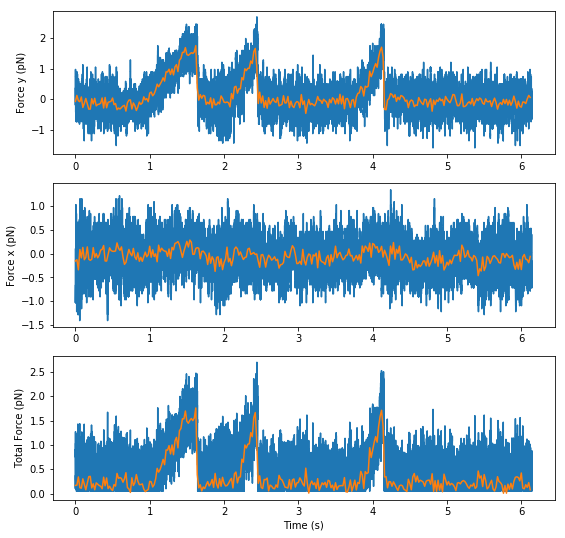

In [ ]:
""" get list of all files in folder """
import glob
files = glob.glob('*.h5') #skip the power spectra
print("found {} files in folder".format(len(files)))

downsampled_rate = 50

for file in files:
    print(file)
    data = pylake.File(file)
    
    
    plt.figure(figsize=(9,9))

    samp_rate = data['Force HF']['Force 1y'].sample_rate

    plt.subplot(3,1,1)
    fy = data['Force HF']['Force 1y']
    time = (fy.timestamps - fy.timestamps[0]) /1e9
    fy_downsamp = fy.downsampled_by(int(samp_rate/downsampled_rate))
    time_downsamp = (fy_downsamp.timestamps - fy_downsamp.timestamps[0]) /1e9
    plt.plot(time, fy.data)
    plt.plot(time_downsamp, fy_downsamp.data)
    plt.ylabel('Force y (pN)')

    plt.subplot(3,1,2)
    fx = data['Force HF']['Force 1x']
    time = (fx.timestamps - fx.timestamps[0]) /1e9
    fx_downsamp = fx.downsampled_by(int(samp_rate/downsampled_rate))
    time_downsamp = (fx_downsamp.timestamps - fx_downsamp.timestamps[0]) /1e9
    plt.plot(time, fx.data)
    plt.plot(time_downsamp, fx_downsamp.data)
    plt.ylabel('Force x (pN)')

    plt.subplot(3,1,3)
    plt.plot(time, np.sqrt(np.power(fx.data, 2) + np.power(fy.data, 2)))
    plt.plot(time_downsamp, np.sqrt(np.power(fx_downsamp.data, 2) + np.power(fy_downsamp.data, 2)))
    plt.ylabel('Total Force (pN)')
    plt.xlabel('Time (s)')

    plt.savefig('graphs/'+file[:-3]+'_'+ str(downsampled_rate) +'_Hz')

found 13 files in folder
20190215-113704 Marker dynamics.h5
20190215-113704 Marker dynamics.h5
20190215-113707 Marker definitely.h5
20190215-113707 Marker definitely.h5
20190215-113713 Marker increase in force.h5
20190215-113713 Marker increase in force.h5
20190215-113715 Marker maybe motion.h5
20190215-113715 Marker maybe motion.h5
20190215-113722 Marker 4.h5
20190215-113722 Marker 4.h5
20190215-113727 Marker 3.h5
20190215-113727 Marker 3.h5
20190215-115718 Marker try 4.h5
20190215-115718 Marker try 4.h5
20190215-115722 Marker try 3.h5
20190215-115722 Marker try 3.h5
20190215-142512 Marker force clamp.h5
20190215-142512 Marker force clamp.h5
20190215-170635 Marker single stepping 1.h5
20190215-170635 Marker single stepping 1.h5
20190215-170637 Marker single steppin 2.h5
20190215-170637 Marker single steppin 2.h5
20190215-170639 Marker single steppin 3.h5
20190215-170639 Marker single steppin 3.h5
20190215-180718 Marker single steppin 4.h5
20190215-180718 Marker single steppin 4.h5


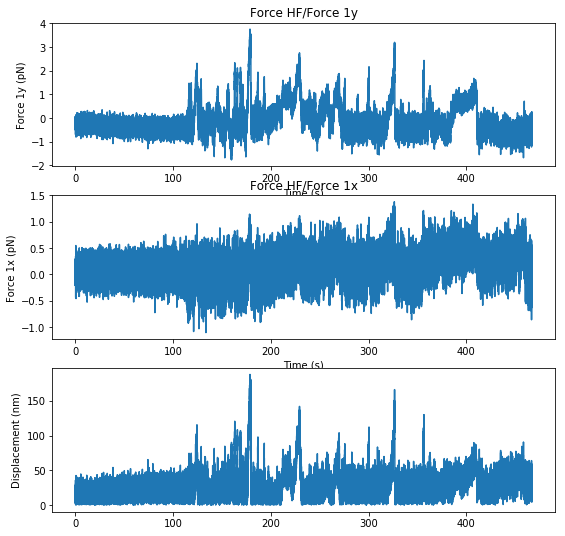

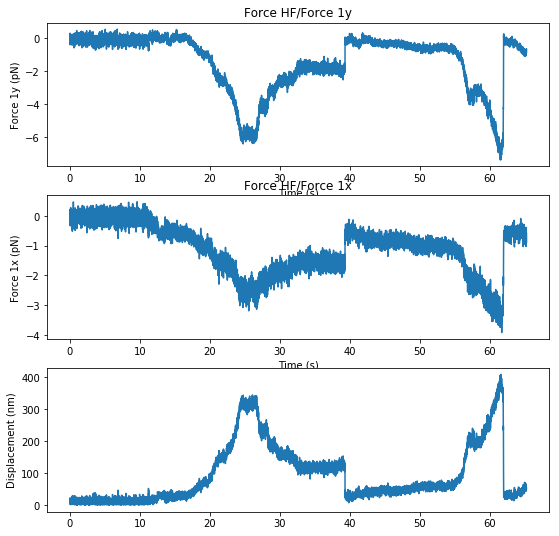

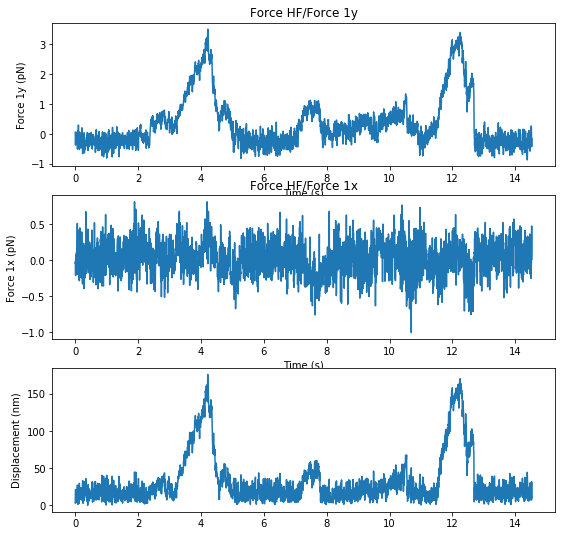

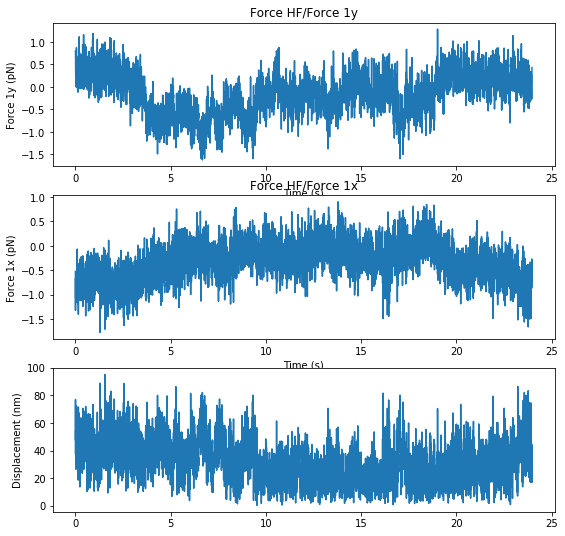

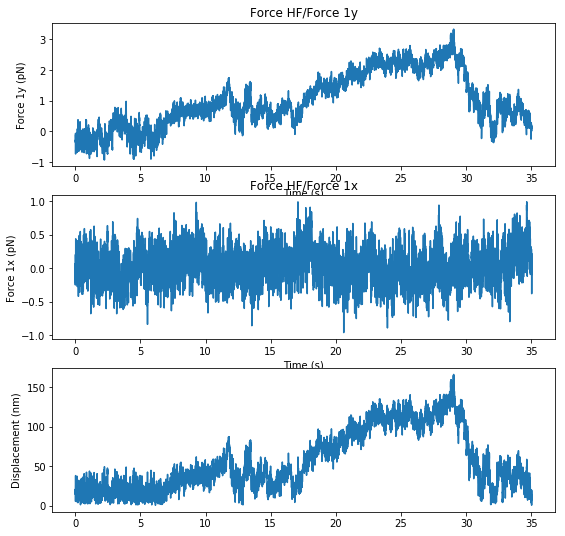

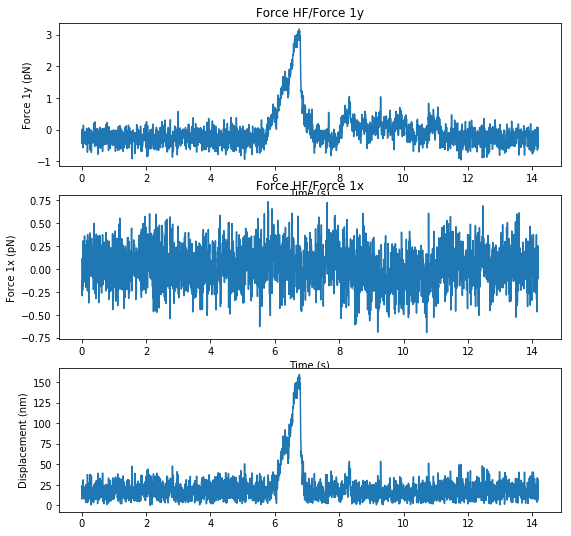

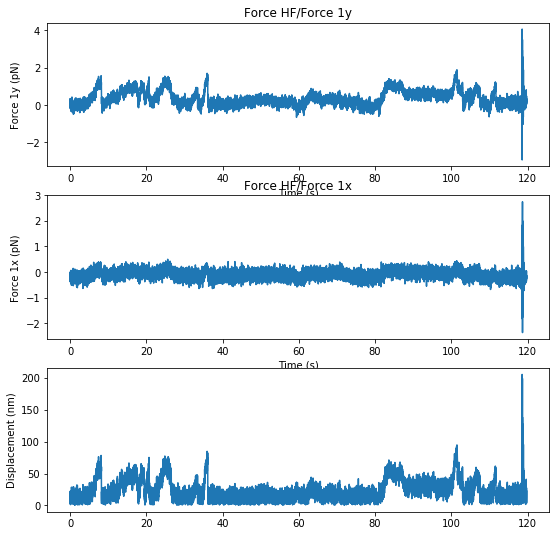

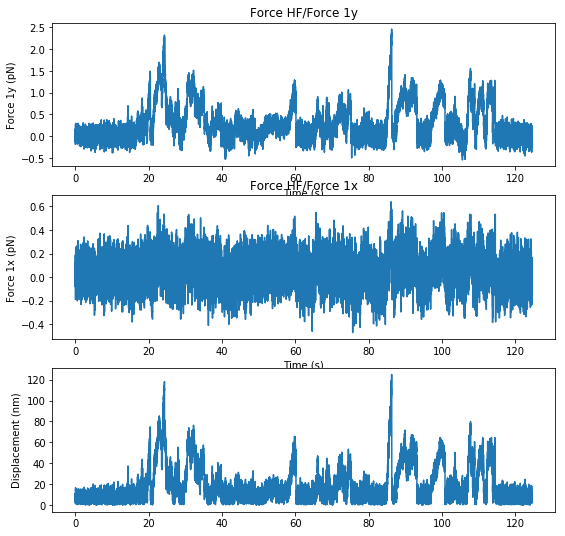

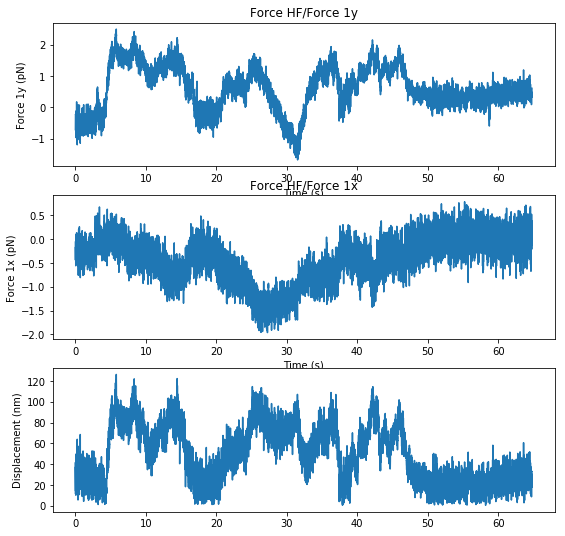

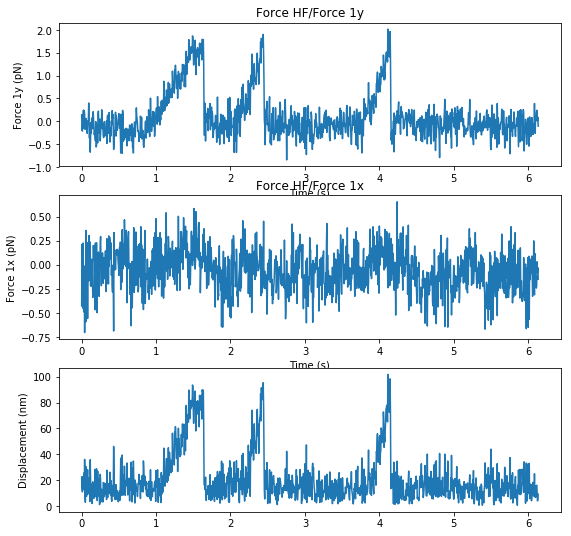

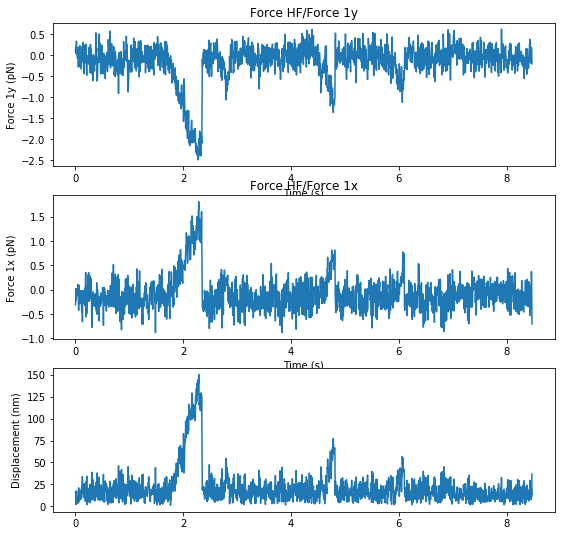

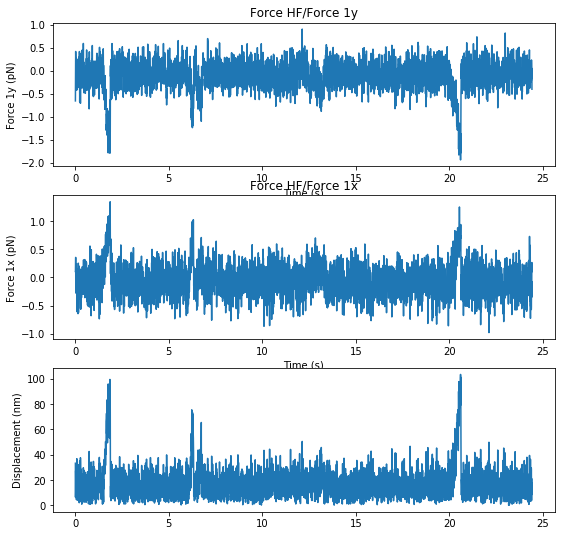

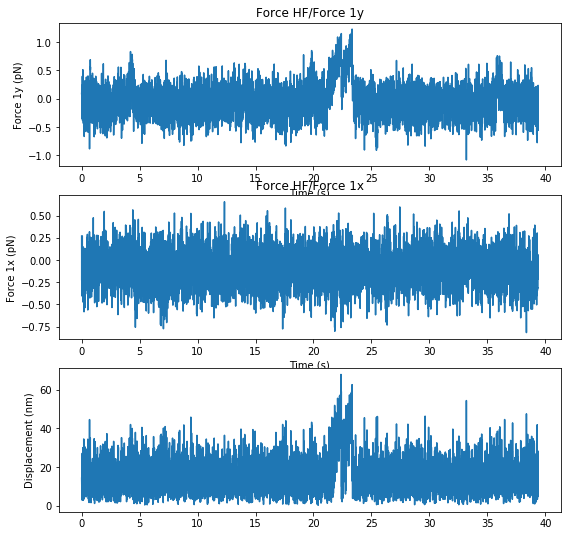

In [15]:
""" get list of all files in folder """
import glob
files = glob.glob('*.h5') #skip the power spectra
print("found {} files in folder".format(len(files)))
for file in files:
    print(file)
    data = pylake.File(file)
    
#     params = data['Calibration']['12']['Force 1y'].h5
    ky = 0.02#params.attrs.get("kappa (pN/nm)")
#     print(ky)

#     params = data['Calibration']['12']['Force 1x'].h5
    kx = 0.02#params.attrs.get("kappa (pN/nm)")
#     print(kx)
    plt.figure(figsize=(9,9))

    sample_rate = 150

    plt.subplot(3,1,1)
    fy = data['Force HF']['Force 1y'].downsampled_by(sample_rate)
    fy.plot()
    plt.ylabel('Force 1y (pN)')

    plt.subplot(3,1,2)
    fx = data['Force HF']['Force 1x'].downsampled_by(sample_rate)
    fx.plot()
    plt.ylabel('Force 1x (pN)')

    plt.subplot(3,1,3)
    time = (fy.timestamps - fy.timestamps[0]) /1e9
    plt.plot(time, np.sqrt(np.power(fx.data/kx, 2) + np.power(fy.data/ky, 2))) 
    plt.ylabel('Displacement (nm)')

    plt.savefig('graphs/'+file[:-3]+'.pdf')
    print(file)

In [7]:
file[:-3]+'.pdf'

'20190215-113704 Marker dynamics.pdf'

## Select one file and list its content 

In [5]:
"""View the structure of an exported file"""
pick_file = 1  # numbering starts from 0
filename = files[pick_file]
f = pylake.File(filename)
print(f)

File root metadata:
- Bluelake version: 1.5.0-fix-timeout.1
- Description: 
- Experiment: 
- GUID: {C3ECEE10-7E84-4175-8C7E-2AA7DFAFA99F}
- Export time (ns): 1542818441186002600
- File format version: 1

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 171
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 171
Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 171
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 171
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 171
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 171
Calibration:
  123:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 0
  Excitation Laser Green:
  - Data 

## Plot one varible 

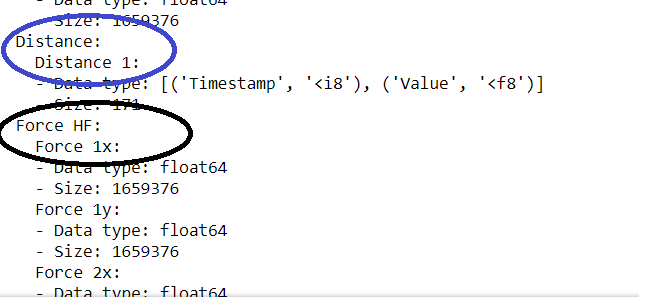

- "f" is the file that you previously selected
- the first bracket is the type of variable you're interested in. These are the leftmost items in the list (e.g. Distance or Force)
- the second bracket is the secondary item in that list. E.g. "Force 1x" is located inside "Force HF"

So a sample code would be like this:
"f["Force HF"]["Force 1x"]"

Then you can use the .plot() command to plot these items

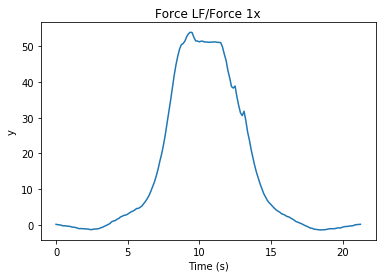

In [6]:
""" Plot the different measured parameters, e.g. force """
plt.figure()

f["Force LF"]['Force 1x'].plot()


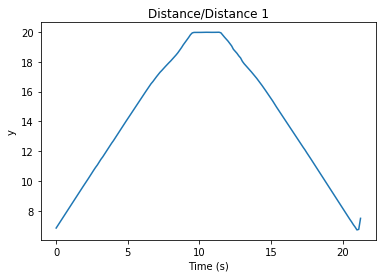

In [7]:
""" Plot the different measured parameters, e.g. force """
plt.figure()

f["Distance"]['Distance 1'].plot()


## Obtain data from the contents (timestamps are in nanoseconds)

In [51]:
""" We get both the recorded data and the timestamps out of the file """

force_data = f["Force LF"]['Force 1x'].data
distance_data = f["Distance"]['Distance 1'].data

force_time = f["Force LF"]['Force 1x'].timestamps

""" Please NOTE that the time data are in NANOSECONDS

    We can convert them to seconds in this way, you subtract the first (zeroth) value, then divide by 1e9 (ten to the power of nine)
""" 

force_time = (force_time - force_time[0]) * 1e-9


Text(0,0.5,'Force (pN)')

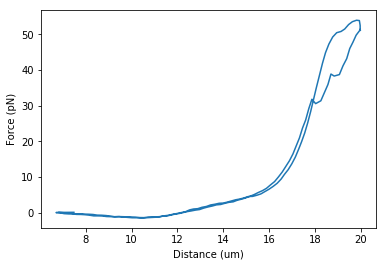

In [11]:
""" We can make the same plot as before with the obtained data """

plt.figure()
plt.plot(distance_data, force_data)

"""Now you have to label the axis yourselves"""

plt.xlabel("Distance (um)")
plt.ylabel("Force (pN)")



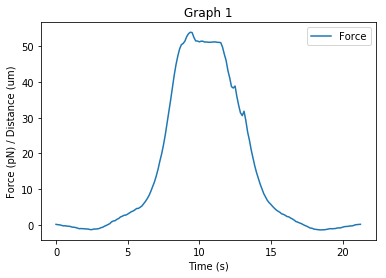

In [52]:
""" We can make the same plot as before with the obtained data """

plt.figure()
plt.plot(force_time, force_data, label='Force')
# plt.plot(force_time, distance_data, label='Distance')

plt.xlabel("Time (s)")
plt.ylabel("Force (pN) / Distance (um)")
plt.title("Graph 1")
plt.legend()


plt.savefig("FDcurve.pdf")

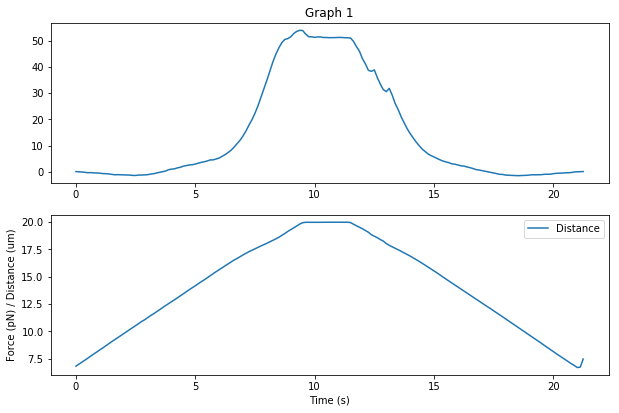

In [53]:
""" We can plot them on two different curves """


plt.figure(figsize=(10, 10)) # this is how you modify the figure size


plt.subplot(3,1,1)
plt.plot(force_time, force_data, label='Force')
plt.title("Graph 1")

plt.subplot(3,1,2)
plt.plot(force_time, distance_data, label='Distance')

plt.xlabel("Time (s)")
plt.ylabel("Force (pN) / Distance (um)")
plt.legend()


""" This is how you save the figures """
plt.savefig("FDcurve.pdf")
plt.savefig("FDcurve.png") # you can save it in different formats



## Get calibration parameters 

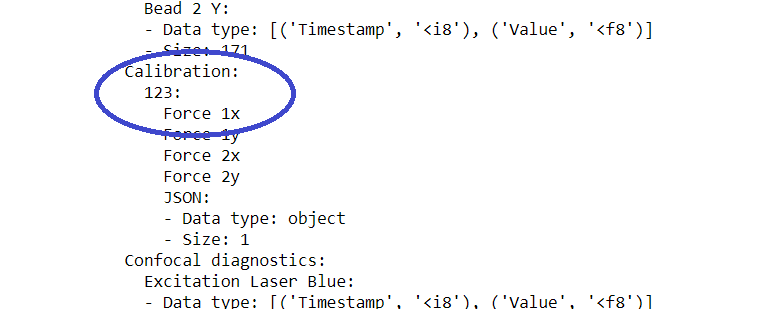

In [36]:
""" Print the list of calibration paramenters """
params = f["Calibration"]["123"]["Force 1x"].h5
list(f["Calibration"]["123"]["Force 1x"].h5.attrs.items())

[('Kind', 'Reset offset to zero'),
 ('Offset (pN)', -85.42205712316107),
 ('Response (pN/V)', 817.3620512725377),
 ('Sign', 1.0),
 ('Start time (ns)', 1542807812426015400),
 ('Stop time (ns)', 1542807822426015400),
 ('Bead diameter (um)', 4.4),
 ('Fit range (max.) (Hz)', 23000.0),
 ('Fit range (min.) (Hz)', 10.0),
 ('Fit tolerance', 1e-07),
 ('Max iterations', 10000.0),
 ('Number of samples', 781250.0),
 ('Points per block', 2000.0),
 ('Sample rate (Hz)', 78125.0),
 ('Temperature (C)', 20.0),
 ('Viscosity (Pa*s)', 0.001002),
 ('D (V^2/s)', 0.0013035237229152086),
 ('Rd (um/V)', 8.644328902663627),
 ('Rf (pN/V)', 817.3620512725377),
 ('alpha', 0.6348574679502846),
 ('backing (%)', 100.0),
 ('chi_squared_per_deg', 3.437949600748519),
 ('err_D', 9.46357965045672e-06),
 ('err_alpha', 0.0026906380810170494),
 ('err_f_diode', 143.89781216952397),
 ('err_fc', 4.065413448229771),
 ('f_diode (Hz)', 7140.409949534314),
 ('fc (Hz)', 362.1694334888449),
 ('kappa (pN/nm)', 0.09455471448115298),
 ('

In [37]:
""" interested in stiffness for example """
stiffness = params.attrs.get("kappa (pN/nm)")
print(stiffness)

0.09455471448115298


## Get bead displacement

Calculate it from force and stiffness using the formula

$\Delta x = \frac{F}{k}$

Text(0,0.5,'Displacement (um)')

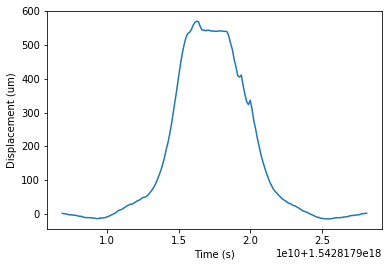

In [55]:
""" This is as before """
force_data = f["Force LF"]['Force 1x'].data
force_time = f["Force LF"]['Force 1x'].timestamps

stiffness = params.attrs.get("kappa (pN/nm)")

""" And this is how you calculate the displacement of the bead from the center of the trap """
displacement = force_data / stiffness


""" And we plot it as before """
plt.plot(force_time, displacement)

plt.xlabel("Time (s)")
plt.ylabel("Displacement (um)")

